In [2]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
from tqdm import tqdm
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
h = cosmos.H0.value/100
from my_util import convert_rp_pi_counts_to_wp as convert_rp_pi_counts_to_wp_2
from astropy.io import fits
from sklearn.neighbors import KDTree

In [3]:
quasar = np.load('../catalogue/quasar_lss_all.npy')
random = np.load('../catalogue/random_quasar_lss_all.npy')

In [ ]:
# quasar_SDSS = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')

# valid = quasar_SDSS['EXTINCTION'][:,3] > 0         # execlude those without extinction

# tree = KDTree(np.c_[quasar_SDSS['RA'][valid], quasar_SDSS['DEC'][valid]], metric='euclidean')
# que = tree.query(np.c_[random['ra'], random['dec']])
# index = que[1].flatten()

# A = quasar_SDSS['EXTINCTION'][valid][index]
# extinction_map = np.zeros(len(random), dtype=[('ra', float), ('dec', float), ('Extinction', float, 5)])
# extinction_map['ra'] = random['ra']
# extinction_map['dec'] = random['dec']
# extinction_map['Extinction'] = A
# np.save('../catalogue/extinction', extinction_map)

In [6]:
extinction_map = np.load('../catalogue/extinction.npy')

(array([3.087904e+06, 1.720601e+06, 1.199117e+06, 5.373850e+05,
        2.301880e+05, 8.380100e+04, 1.481600e+04, 3.130000e+02,
        3.200000e+01, 3.000000e+00]),
 array([0.00393854, 0.04146935, 0.07900015, 0.11653096, 0.15406176,
        0.19159257, 0.22912337, 0.26665418, 0.30418498, 0.34171579,
        0.37924659]),
 <BarContainer object of 10 artists>)

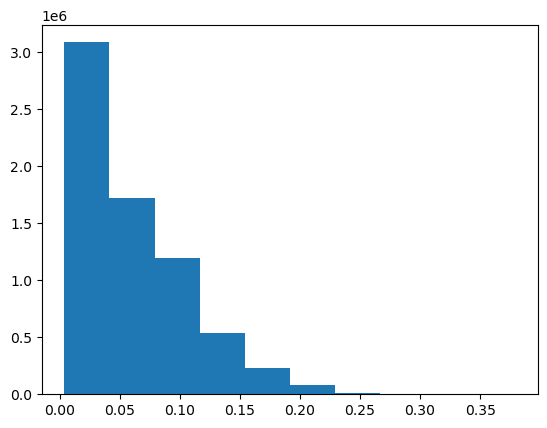

In [9]:
plt.hist(extinction_map['Extinction'][:,3])

In [3]:
delta_A_i = extinction_map['Extinction'][:,3] - extinction_map['Extinction'][:,3].mean()

In [6]:
ra = extinction_map['ra']
dec = extinction_map['dec']

z = random['z'].mean()

distance = cosmos.angular_diameter_distance(z).to('Mpc').value*h

In [9]:
rp_bins = np.geomspace(3, 100, 16)
theta_bins = rp_bins/h/(1+z)/distance       # rad

In [10]:
import treecorr as tc

In [12]:
map = tc.Catalog(ra=ra, dec=dec, k=delta_A_i, ra_units='deg', dec_units='deg', npatch=100)
kk = tc.KKCorrelation(nbins=15, min_sep=theta_bins[0], max_sep=theta_bins[-1], metric='Arc', sep_units='rad')

In [14]:
kk.process(map, num_threads=40)

Text(0, 0.5, '$\\langle\\delta_A \\delta_A\\rangle$')

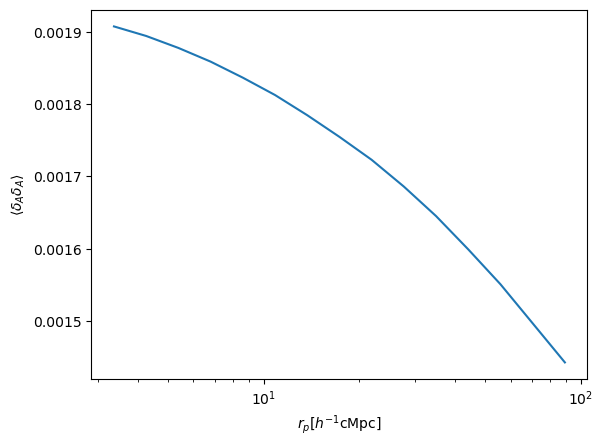

In [28]:
plt.plot((rp_bins[1:]*rp_bins[:-1])**0.5, kk.xi)
plt.semilogx()
plt.xlabel('$r_p[h^{-1}\\text{cMpc}]$')
plt.ylabel(r'$\langle\delta_A \delta_A\rangle$')